In [1]:
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = ['sales','returns','credit fees','rebates','late charges','shipping']
b = [350000,-30000,-7500,-25000,95000,-7000]

In [3]:
def waterfall(index, data, Title = "Example Chart", x_lab = "Example Increments", y_lab = "Example values",
              formatting = "{:,.1f}", green_color='#29EA38', red_color='#FB3C62', blue_color='#24CAFF',
             sorted_value = False, threshold=None):
    
    #convert data and index to np.array
    index=np.array(index)
    data=np.array(data)
    
    #sorted by absolute value 
    if sorted_value: 
        abs_data = abs(data)
        data_order = np.argsort(abs_data)[::-1]
        data = data[data_order]
        index = index[data_order]
    
    #group contributors less than the threshold into 'other' 
    if threshold:
        
        abs_data = abs(data)
        threshold_v = abs_data.max()*threshold
        
        if threshold_v > abs_data.min():
            index = np.append(index[abs_data>=threshold_v],'other')
            data = np.append(data[abs_data>=threshold_v],sum(data[abs_data<threshold_v]))
    
    changes = {'amount' : data}
    
    def money(x, pos):
        'The two args are the value and tick position'
        return formatting.format(x)
    formatter = FuncFormatter(money)

    #Store data and create a blank series to use for the waterfall
    trans = pd.DataFrame(data=changes,index=index)
    blank = trans.amount.cumsum().shift(1).fillna(0)
    
    trans['positive'] = trans['amount'] > 0

    #Get the net total number for the final element in the waterfall
    total = trans.sum().amount
    trans.loc["Net"]= total
    blank.loc["Net"] = total

    #The steps graphically show the levels as well as used for label placement
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan

    #When plotting the last element, we want to show the full bar,
    #Set the blank to 0
    blank.loc["Net"] = 0
    
    
    trans.loc[trans['positive'] > 1, 'positive'] = 99
    trans.loc[trans['positive'] < 0, 'positive'] = 99
    #trans.iloc[0, trans.columns.get_loc('positive')] = 99
    

    #Plot and label
    my_plot = trans['amount'].plot(kind='bar', stacked=True, bottom=blank,legend=None, 
                                   figsize=(10, 5), title=Title, 
                                   color=trans.positive.map({1: green_color, 0: red_color, 99:blue_color, 
                                                             100:"gray"}))
    #my_plot.plot(step.index, step.values,'k') #this makes the blank lines
    my_plot.set_xlabel("\n" + x_lab)
    my_plot.set_ylabel(y_lab + "\n")
    
    #Format the axis for dollars
    my_plot.yaxis.set_major_formatter(formatter)

    #Get the y-axis position for the labels
    y_height = trans.amount.cumsum().shift(1).fillna(0)

    #Get an offset so labels don't sit right on top of the bar
    max = abs(trans['amount'].max())
    min = abs(trans['amount'].min())
    
    temp = list(trans.amount)
    
    for i in range(len(temp)):
        if (i > 0) & (i < (len(temp) - 1)):
            temp[i] = temp[i] + temp[i-1]
    
    trans['temp'] = temp
            
    plot_max = trans['temp'].max()
    plot_min = trans['temp'].min()
    
    if max >= min:
        maxmax = max   
    else:
        maxmax = min
        
    pos_offset = maxmax / 50
    plot_offset = int(maxmax / 15) ## needs to me cumulative sum dynamic

    #Start label loop
    loop = 0
    for index, row in trans.iterrows():
        # For the last item in the list, we don't want to double count
        if row['amount'] == total:
            y = y_height[loop]
        else:
            y = y_height[loop] + row['amount']
        # Determine if we want a neg or pos offset
        if row['amount'] > 0:
            y += (pos_offset*1.2)
            my_plot.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'g')
        else:
            y -= (pos_offset*2.3)
            my_plot.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'r')
        loop+=1

    #Scale up the y axis so there is room for the labels
    my_plot.set_ylim(plot_min-2*int(plot_offset),plot_max+2*int(plot_offset))
    #Rotate the labels
    my_plot.set_xticklabels(trans.index,rotation=0)
    my_plot.axhline(0, color='black', linewidth = 0.6)

    return my_plot


In [24]:
a = ['sales','returns','credit fees','rebates','late charges','shipping']
b = [350000,-30000,-7500,-25000,95000,-7000]

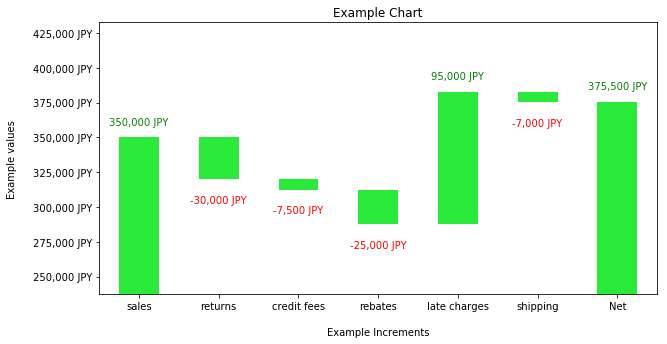

In [25]:
plot = waterfall(a, b, formatting= "{:,.0f} JPY")

In [4]:
a = ['sales','returns','credit fees','rebates','late charges','shipping']
b = [350000,-30000,-7500,-25000,95000,-7000]

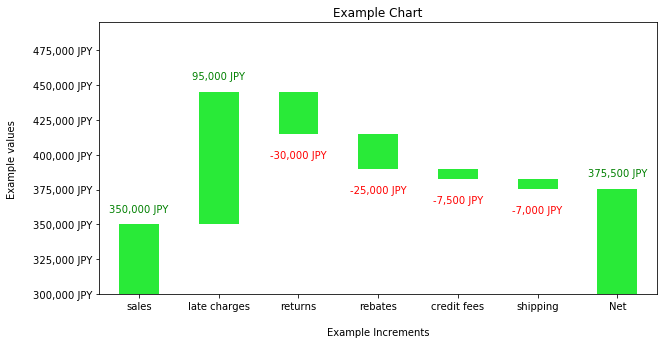

In [5]:
plot = waterfall(a, b, formatting= "{:,.0f} JPY", sorted_value=True)

In [6]:
a = ['sales','returns','credit fees','rebates','late charges','shipping']
b = [350000,-30000,-7500,-25000,95000,-7000]

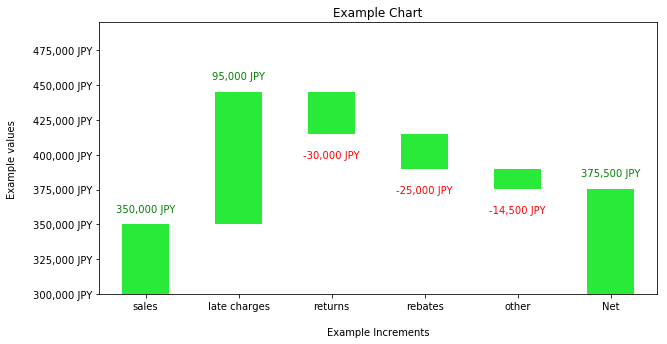

In [8]:
plot = waterfall(a, b, formatting= "{:,.0f} JPY", sorted_value=True, threshold=0.05)